# CAPM 实现及测试

In [1]:
import pandas as pd

In [2]:
test_fund = pd.read_excel('test_fund.xlsx', index_col=0)
test_fund.index = pd.to_datetime(test_fund.index).date
test_fund

,单位净值,累计净值,复权累计净值
2019-09-09,1.0000,1.0000,1.0000
2019-09-27,0.9986,0.9986,0.9986
2019-09-30,0.9971,0.9971,0.9971
2019-10-11,1.0000,1.0000,1.0000
2019-10-18,1.0018,1.0018,1.0018
...,...,...,...
2021-10-22,1.1938,1.1938,1.1938
2021-10-29,1.1892,1.1892,1.1892
2021-11-05,1.1853,1.1853,1.1853
2021-11-12,1.1956,1.1956,1.1956


In [3]:
type(test_fund.index[0])

datetime.date

## 获取中证500行情

In [4]:
import tushare as ts

In [5]:
# import my tushare package
from support.tushare_pro import TushareData

In [6]:
td = TushareData()

In [7]:
zz_500 = td.daily_index(ts_code='000905.sh')
zz_500.tail()

,ts_code,close,open,high,low,pre_close,change,pct_chg,vol,amount
2022-07-28,000905.SH,6348.1655,6361.2729,6393.7268,6339.5502,6332.2327,15.9328,0.2516,138473429.0,1.526623e+08
2022-07-29,000905.SH,6294.1144,6356.5204,6365.2595,6285.7193,6348.1655,-54.0511,-0.8514,137925792.0,1.529613e+08
2022-08-01,000905.SH,6347.2211,6293.3831,6350.0383,6253.0553,6294.1144,53.1067,0.8438,128679012.0,1.513489e+08
2022-08-02,000905.SH,6169.9961,6288.6064,6288.6064,6095.0566,6347.2211,-177.2250,-2.7922,182902539.0,1.928734e+08
2022-08-03,000905.SH,6124.3146,6171.6172,6261.9097,6111.2198,6169.9961,-45.6815,-0.7404,147213409.0,1.755448e+08


In [8]:
type(zz_500.index[0])

datetime.date

In [9]:
test_data = pd.concat([test_fund['单位净值'], zz_500['close']], axis=1, join='inner')
test_data.columns = ['基金净值', '中证500收盘价']
test_data

,基金净值,中证500收盘价
2019-09-09,1.0000,5263.4594
2019-09-27,0.9986,5005.6299
2019-09-30,0.9971,4940.9030
2019-10-11,1.0000,5055.5165
2019-10-18,1.0018,4961.8072
...,...,...
2021-10-22,1.1938,7026.0676
2021-10-29,1.1892,7022.4992
2021-11-05,1.1853,6991.9077
2021-11-12,1.1956,7156.6127


## 获取净值表现

In [ ]:
from support.my_finance import BasicCalculation
mf = BasicCalculation()

In [ ]:
drifts = mf.drifts(test_data)
drifts

In [ ]:
from support.matplotlib_ch_font import matplot_ch_font
matplot_ch_font()

In [ ]:
drifts['基金净值'].plot(kind='hist', bins=50, figsize=(30,15), grid='both')

In [ ]:
drifts.plot(kind='hist', bins=50, figsize=(30,15), grid='both', alpha=0.5)

In [ ]:
mf.accumulate_return(test_data).plot()

## 去除outlier及数据标准化

去除outlier

In [ ]:
trim_data = mf.exclude_outliers_mad(data = drifts, n = 4)
trim_data.plot(kind='hist', bins=50, figsize=(30,15), grid='both', alpha=0.5)

In [ ]:
normalized_data = mf.normalized(data=trim_data)
normalized_data.plot(kind='hist', bins=50, figsize=(30,15), grid='both', alpha=0.5)

## 中证500回归

In [ ]:
regression_result = mf.linear_regression(y_input=normalized_data['基金净值'], x_input=normalized_data['中证500收盘价'])
regression_result.summary()

## 去除outlier及数据标准化

去除outlier

<AxesSubplot:ylabel='Frequency'>

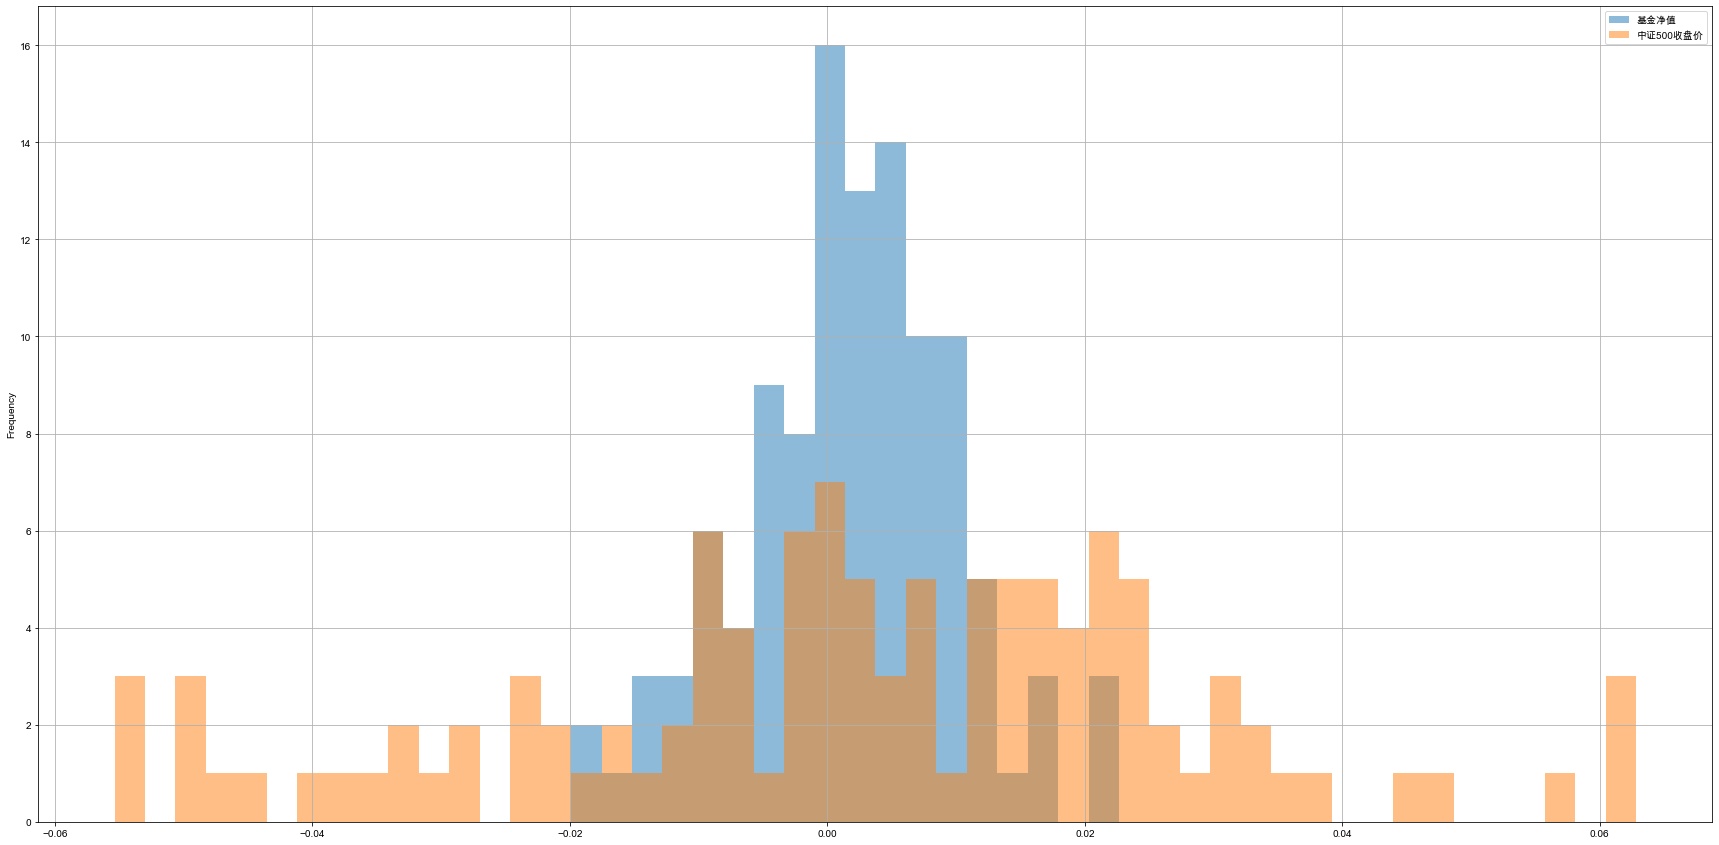

In [16]:
trim_data = mf.exclude_outliers_mad(data = drifts, n = 4)
trim_data.plot(kind='hist', bins=50, figsize=(30,15), grid='both', alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

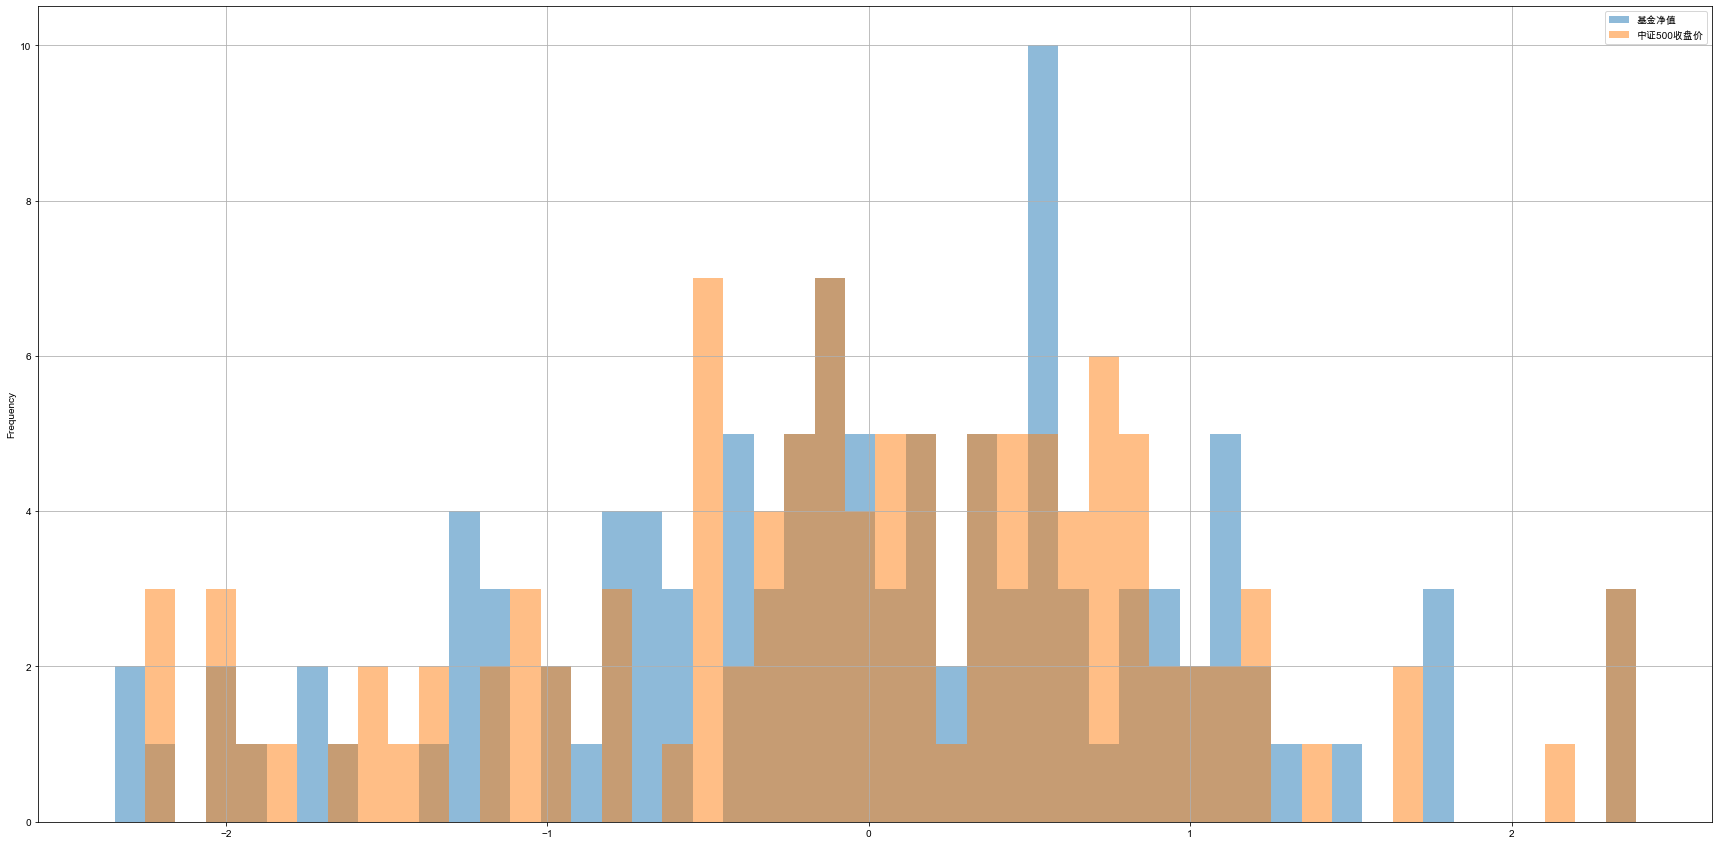

In [17]:
normalized_data = mf.normalized(data=trim_data)
normalized_data.plot(kind='hist', bins=50, figsize=(30,15), grid='both', alpha=0.5)

## 中证500回归

In [19]:
regression_result = mf.linear_regression(y_input=normalized_data['基金净值'], x_input=normalized_data['中证500收盘价'])
regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   基金净值   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     151.1
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           2.58e-22
Time:                        11:15:29   Log-Likelihood:                -108.73
No. Observations:                 111   AIC:                             221.5
Df Residuals:                     109   BIC:                             226.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.041e-17      0.062   1.69e-16      1.000      -0.122       0.122
中证500收盘价       0.7622      0.062     12.292      0.000       0.639       0.885
==============================================================================
Omnibus:                        4.601   Durbin-Watson:                   2.574
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                5.691
Skew:                           0.139   Prob(JB):                       0.0581
Kurtosis:                       4.074   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""